# CA1 Assigment Submission:
<span id="0"></span>
**Author:** Dexter Chew
<br>**Date:** 29th May 2022
<br>**Student ID:** p7414405

### Report Overview
This Notebook is written as a submission report for CA1 Assignment. In the report there will be 3 separate datasets that requires analysis - Part A-C. For this particular report it will be on Datasest A- Titanic Dataset. <br><br> In Part A, I will be analyzing the Titanic Dataset from Kaggle. This is a classification problem to predict whether an individual would have survied the titanic incident. I will be creating a ML pipeline to assess this data. For Part B, I will be analysing the King County dataset and attempt to create a ML model that predicts the housing sales prices. Lastly, for Part C, I will be analyzing my own dataset of interest.

### Objective: Binary Classification Problem
To predict whether a passenger would survive or not during the Titanic ship incident. A binary classification problem.

## Contents Page
- Part A: Titantic Classification Problem
     1. [Exploratory-Data-Analysis-(EDA)](#1)
     2. [Data Visualization](#2)
     3. [Data Preparation (Training Data)](#3)
     4. [Model Training](#4)
     5. [Score and Evaluate Model](#5)
     6. [Kaggle Submission](#6)
     7. [Conclusion](#7)


    

In [1]:
#Generic Pacakges
import numpy as np
import pandas as pd
import matplotlib
import platform
from matplotlib import pyplot as plt
import seaborn as sns

#Machine Learning Packages
import sklearn
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder,RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV #Use GridSearchCV to find the best combination
from sklearn.model_selection import cross_val_score #Use cross validation to find the best params
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, f1_score,precision_recall_curve
%matplotlib inline

message="        Versions        "
print("*"*len(message))
print(message)
print("*"*len(message))
print("Scikit-learn version={}".format(sklearn.__version__))
print("Numpy version={}".format(np.__version__))
print("Pandas version={}".format(pd.__version__))
print("Matplotlib version={}".format(matplotlib.__version__))
print("Python version={}".format(platform.python_version()))

# shift-tab to show docstring: highlight and shift-tab: format
#?zip()
#%lsmagic
# Suppress Future Warnings
import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

************************
        Versions        
************************
Scikit-learn version=0.22.1
Numpy version=1.18.1
Pandas version=1.0.1
Matplotlib version=3.1.3
Python version=3.7.6


### Initial Dataset Importation

In [2]:
train_datalink = r"data\titanic\train.csv"
titanic = pd.read_csv(train_datalink)
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
titanic.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


## <span id="1"></span> 1. Exploratory Data Analysis (EDA)
[Back to Main](#0)

Purpose: To bring to light the attributes that are available and to identify the data-type (e.g. integers,string,booleans etc.) and an overview of the attributes (e.g. presence of outliers, null-objects etc.) based on contexts for ease of processing later during data clean-up as well as identifying. Additionally, it is also good to identify the size of the dataset so that we can process the data during modelling as well (e.g. train-test split, data sufficiency, processing times etc.)

### Key Points Based on "Prior/Contextual Knowledge"

<ol>
<li>Individuals with different names might represent different ranks. </li>
<li>Younger and older people might survive better than regular individuals due to "weaker" population. </li>
<li>Similar could be said about gender as well. </li>
<li>Possibly that higher ranking indiivduals might survive better due to previledges. </li>
<li>Point of disembarkment will also suggest the seating locations/status of the individuals, suggesting potential predictor variables.</li>
<li>Checking for null values and addressing them into NaN then modify replace to mean/median or drop them.</li>
</ol>

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# List out all variables with nulls/missing values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Get list of numeric and nonnumeric variables
numvars = list(titanic.columns[titanic.dtypes != "object"]) #Numerical Data
nonnumvars = list(titanic.columns[titanic.dtypes == "object"]) #Categorical Data
print(numvars)
print(nonnumvars)

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


### About Dataset

From Kaggle website that describes the dataset:




|Variable | Definition | Key | Data | Type |
| --- | --- | --- | --- | --- |
Survived | Survival | 0 = No, 1 = Yes | Categorical | Response
Pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd | Categorical (Ordinal) | Feature
Sex	| Sex	| --- | Categorical | Feature
Age | Age in years | --- | Numeric | Feature
SibSp | # of siblings / spouses aboard the Titanic | --- | Numeric | Feature
Parch | # of parents / children aboard the Titanic	| --- | Numeric | Feature
Ticket | Ticket number	| --- | Numeric | Feature
Fare | Passenger fare	| --- | Numeric | Feature
Cabin | Cabin number	| --- | Numeric | Feature
Embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton | Categorical | Feature
Name | Passenger's full name | --- | Categorical | Feature
PassengerId | Onboarding ID number | --- | Numeric | Feature

### Comments
- Supposedly Survived, Pclass and PassengerId are actually categorical variables
- For Pclass, it is considered as ordinal data (Still under categorical data).
- For Survived, it is also a categorical data but can be considered is inherently coded.
- Thus, to shift Pclass and Survived to categorical variables.
- Base on the statistical description, we can also see that Fare, PassengerID and maximum values are an order of magnitude larger than others which requires some normalization for certain models like logisitical regression so that factors have a fair weightage. 
- Notice that a large proportion of Cabin details are missing out of the total 891 parts. To drop this data column as the data might only introduce noise if there's imputation.

% Survived: 38.38%


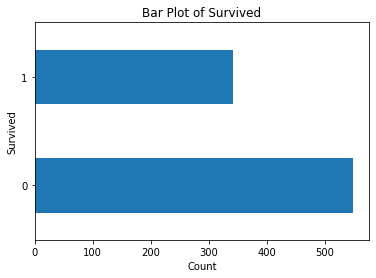

In [8]:
titanic['Survived'].value_counts().plot(kind='barh')
plt.xlabel('Count')
plt.ylabel("Survived")
plt.title("Bar Plot of Survived")

print("% Survived: {:.2f}%".format(100*titanic['Survived'].value_counts()[1]/(sum(titanic['Survived'].value_counts()))))

Text(0.5, 1.0, 'Bar Plot of PClass')

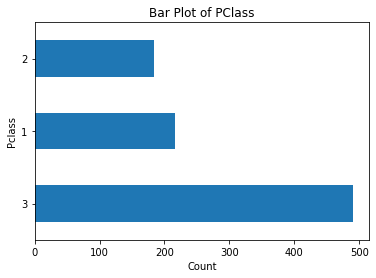

In [9]:
#Comments: While 
titanic['Pclass'].value_counts().plot(kind='barh')
plt.xlabel('Count')
plt.ylabel("Pclass")
plt.title("Bar Plot of PClass")

Text(0.5, 1.0, 'Scatter plot of Passenger Id against Index')

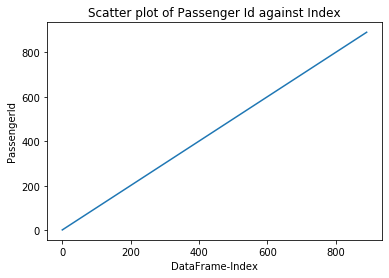

In [10]:
plt.plot(titanic.index,titanic['PassengerId'])
plt.xlabel('DataFrame-Index')
plt.ylabel("PassengerId")
plt.title("Scatter plot of Passenger Id against Index")

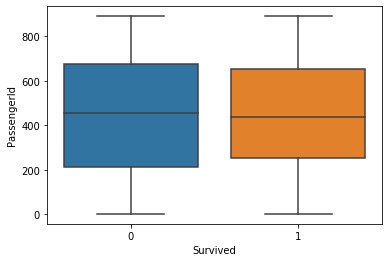

In [11]:
sns.boxplot(x='Survived', y='PassengerId', data=titanic)

### Comments
- PassengerIds are found to be 1 step away from the index of the dataframe. Thus, this can actually be dropped if it is found that there is no relationship between th PassengerIds and survival rate. This will be true if the data that is laid out is random (i.e. no meaning in the Ids). From the boxplot, we can see that between staying alive or not, there is no significant difference in passengerids between the 2.
- Thus, to drop PassengerIds.
- Also good to note that majority of the passengers are in lower 3rd class seats and most of them are dead.

In [12]:
# Do some further exploration on list to get list of features used
# 1. Numerical Variables
numvars.remove('PassengerId')
numvars.remove('Survived')
numvars.remove('Pclass')
numfeats = numvars
print("Numerical Variables:{}".format(numfeats))
# 2. Categorical Variables
# nonnumvars.append('PassengerId') removed
nonnumvars.append('Survived')
nonnumfeats = nonnumvars
print("Categorical Variables:{}".format(nonnumfeats))

Numerical Variables:['Age', 'SibSp', 'Parch', 'Fare']
Categorical Variables:['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Survived']


## <span id="2"></span> 2. Data Visualization
[Back to Main](#0)

### Numerical Features

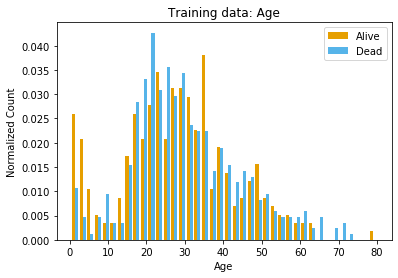

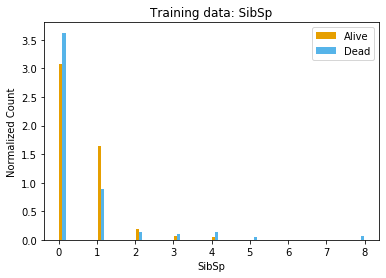

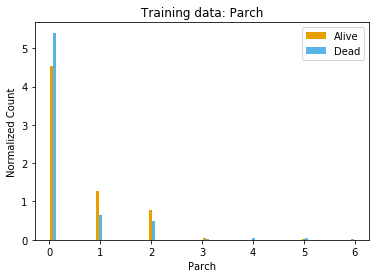

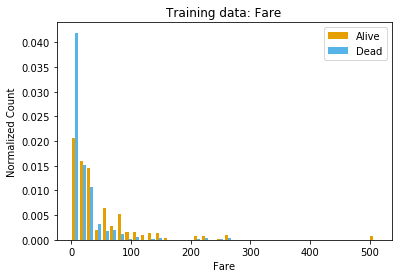

In [13]:
#Histogram: Indentification for Binning Potential
for num_data in numfeats:
    # Make a separate list for each survivor result
    x1 = list(titanic[titanic['Survived'] == 1][num_data])
    x2 = list(titanic[titanic['Survived'] == 0][num_data])
    # Normalize the flights and assign colors and names
    # Assign colors for each result and the names
    colors = ['#E69F00', '#56B4E9']
    names = ['Alive', 'Dead']
    plt.hist([x1, x2], bins = 40, density=True,color = colors, label=names)
    #plt.hist(titanic[num_data],align='mid',bins=40)
    plt.title("Training data: " + num_data)
    plt.xlabel(num_data)
    plt.ylabel("Normalized Count")
    plt.legend()
    plt.show()

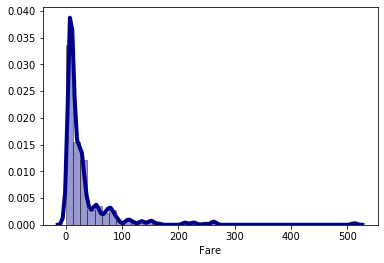

In [14]:
sns.distplot(titanic['Fare'], hist=True, kde=True, 
            bins=40, color = 'darkblue', 
            hist_kws={'edgecolor':'black'},
            kde_kws={'linewidth': 4})

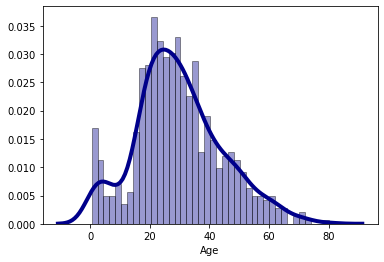

In [15]:
sns.distplot(titanic['Age'], hist=True, kde=True, 
            bins=40, color = 'darkblue', 
            hist_kws={'edgecolor':'black'},
            kde_kws={'linewidth': 4})

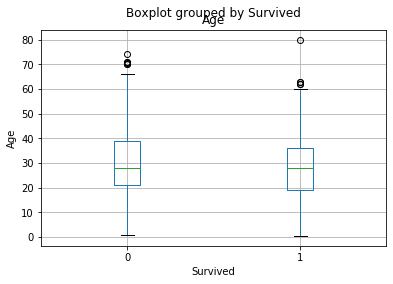

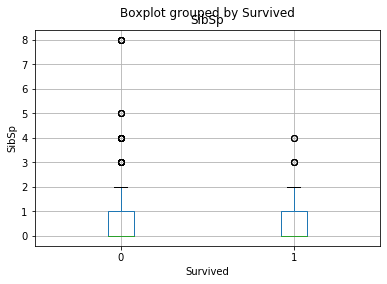

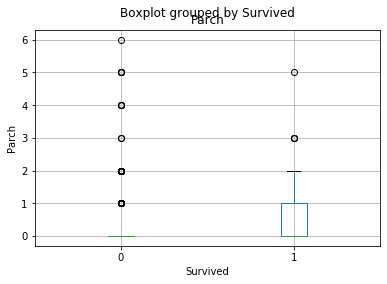

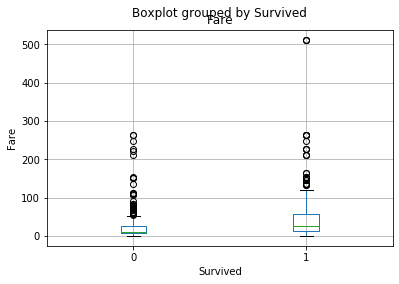

In [16]:
#Boxplots: To observe statistical differences
for num_data in numfeats:
    # Make a separate list for each survivor result
    titanic.boxplot(column= num_data, by='Survived')
    plt.xlabel("Survived")
    plt.ylabel(num_data)
    plt.show()

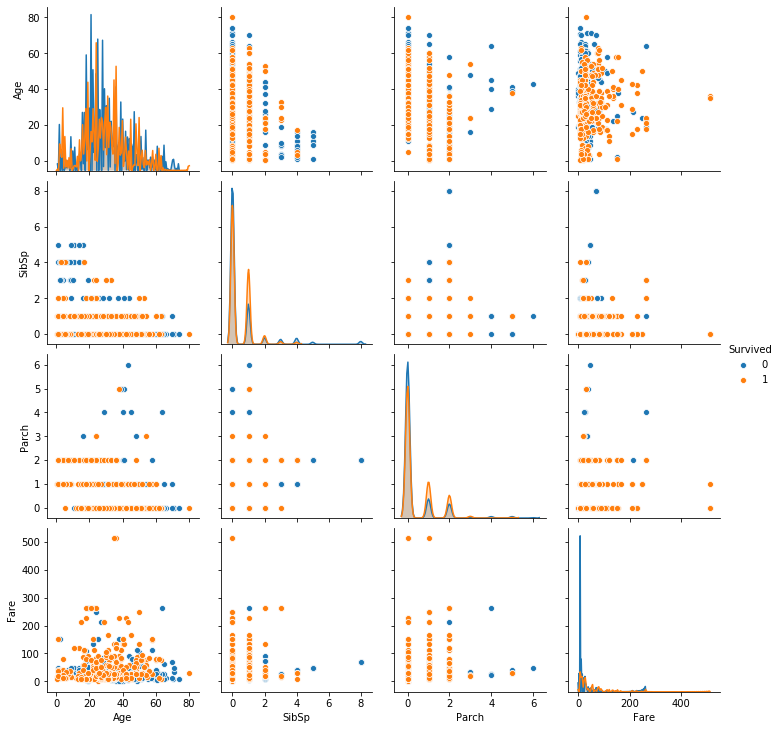

In [17]:
#Scatter plot: To illustrate the correlation (if any)
numfeats.append("Survived")
sns.pairplot(titanic[numfeats], hue="Survived", diag_kws={'bw': 0.1})
numfeats.remove("Survived")

Training data
            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


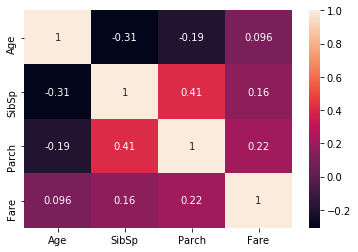

In [18]:
#Correlation Matrix: Identification of dependency potential relationship
# heat map to show up variables which show a high correlation...
# if two variables have a high corelation then they may not be independant so could 
# bias the ML algorithm (although not random forrest type models)
print("Training data")
print(titanic[numfeats].corr())
sns.heatmap(titanic[numfeats].corr(),annot=True)

### Comments:
- Potentially, having to bin the data (https://towardsdatascience.com/binning-for-feature-engineering-in-machine-learning-d3b3d76f364a)
- Age: To bin below 15 years old, between 15 to 45 and above 45 years old. We can see a distinct transition or presence of 3 distributions or groups of people on board the ship (i.e. the young, middle aged and the old). 
- We can see that younger people tend to survive better from the histogram.
- We can also see that having siblings and parents/spouse (i.e. relatives on board) in that matter, increases the survivability.
- Paying higher fares also seem to increase survivability rates.
- In terms of the correlation matrix, we can see that there is some weak linear relationship bewteen SibSp and Parch. This may suggests presence of families. When there's more parents or children, you have more siblings. In particular, the more children one has, the more counts of siblings will be observed. Other than this, the numerical factos remain quite independent.

### Categorical Features
- Bar Chart Illustrations
- Contingency Table

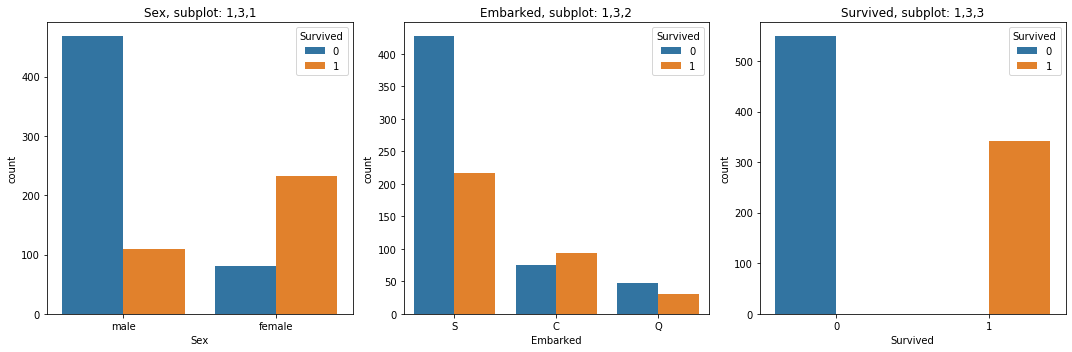

In [19]:
#Boxplots: To observe categorical relationships with response variables

#  Categorical Data
a = 1  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,5))

#To remove multi-categories item (e.g. Name/Ticket/Cabin)
nonnumfeats.remove("Name")
nonnumfeats.remove("Ticket")
nonnumfeats.remove("Cabin")

for i in nonnumfeats:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {},{},{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.countplot(x=i, hue="Survived", data=titanic)
    c = c + 1

plt.tight_layout()
plt.show()

### Comments:
- Looking at the categorical data bar plots, we can see that there are certain values of Gender and embarking locations are valuable in terms determining the survival rates. 
- From the Sex subplot, we can see males having a significantly lower proportion of survival rates than females. 
- From the Embarkation subplot, we can see that there are more propotion of individuals embarking from Southampton facing survival issues compared to Cherbourg and Queenstown. There is a larger proportion from Cherbourg that survived.
- For the other categorical variables like Name, Ticket and Cabin number we might have feature engineer them, by extracting key groups or features before visualization as there are many categories for any fruitful observations.

In [20]:
#Contingency Table: Check correlation between categorical variables
# An often quoted guideline for the validity of this calculation is that the test should be used only if the observed and expected frequencies in each cell are at least 5. Pass. Alternatively, possible to use package from researchpy.

from scipy import stats

data_crosstab=pd.crosstab(titanic['Sex'], titanic['Survived'], margins=True)
print(data_crosstab)
chi2Values=stats.chi2_contingency(data_crosstab)
print("Chi-sq Test p-value: {:.2f}".format(chi2Values[1]))

Survived    0    1  All
Sex                    
female     81  233  314
male      468  109  577
All       549  342  891
Chi-sq Test p-value: 0.00


In [21]:
#Contingency Table: Check correlation between categorical variables
# contingecy table with row and column totals
data_crosstab=pd.crosstab(titanic['Embarked'], titanic['Survived'], margins=True)
print(data_crosstab)
chi2Values=stats.chi2_contingency(data_crosstab)
print("Chi-sq Test p-value: {:.2f}".format(chi2Values[1]))

Survived    0    1  All
Embarked               
C          75   93  168
Q          47   30   77
S         427  217  644
All       549  340  889
Chi-sq Test p-value: 0.00


In [22]:
#Contingency Table: 
# contingecy table with row and column totals
data_crosstab=pd.crosstab(titanic['Sex'], titanic['Embarked'], margins=True)
print(data_crosstab)
chi2Values=stats.chi2_contingency(data_crosstab)
print("Chi-sq Test p-value: {:.2f}".format(chi2Values[1]))

Embarked    C   Q    S  All
Sex                        
female     73  36  203  312
male       95  41  441  577
All       168  77  644  889
Chi-sq Test p-value: 0.04


### Comments:
- Notice from the Contingency Table Chi-square analysis of categorical variables, between variables of "Sex" and "Embarked", we can see some statistical significance showing that the variables are dependent. However, due to border line to 5% significance level, possible to keep the data until unnecessary.
- The p-values for each category to the response variable demonstrates are clear statistical significance dependent relationship at p-values 0.00. Thus, to expect and include these variables in the model.

## <span id="3"></span> 3. Data Preparation/Feature Engineering
[Back to Main](#0)

Purpose: Clean up data in dataframe due to errors, duplicates and to standardized the formats for processing later.

- Drop redundant columns
- Convert all unrealistic values to zero (e.g. Negative shares)
- Drop duplicate rows
- One-Hot Encoding for categorical data

In [23]:
#Creating duplicated dataframe for feature engineering
df = titanic.copy()

### Dropping columns and redundant features

In [24]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
df = df.drop('Cabin', 1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Feature Engineering

#### 1. Ticket- Processing

In [26]:
#To separate the alphabets from the numbers
df[['Ticket-Alpha', 'Ticket-No','Test']] = df['Ticket'].str.split(' ', expand=True)
# display the dataframe
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Ticket-Alpha,Ticket-No,Test
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,A/5,21171,None
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,PC,17599,None
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,STON/O2.,3101282,None
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,113803,None,None
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,373450,None,None


In [27]:
df.loc[(df['Ticket-Alpha'].str.isnumeric()),['Ticket-No']]=df.loc[(df['Ticket-Alpha'].str.isnumeric()), ['Ticket-Alpha']]
df['Ticket-Alpha']=pd.to_numeric(df['Ticket-Alpha'],errors='coerce') #Converts non-numeric to NaN
df['Ticket-No']=df['Ticket-No'].combine_first(df['Ticket-Alpha']) #Combine and replace all the NaNs
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Ticket-Alpha,Ticket-No,Test
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,NaN,21171,None
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,NaN,17599,None
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,NaN,3101282,None
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,113803.0,113803,None
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,373450.0,373450,None


In [28]:
df=df.drop(columns=['Ticket-Alpha', 'Test','Ticket'])
df['Ticket-No']=pd.to_numeric(df['Ticket-No'],errors='coerce') #Converts non-numeric to NaN
df[df["Ticket-No"]==np.nan] #Non thati is non-numeric yet, there are still some null values. Weird

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Ticket-No


In [29]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
Ticket-No        5
dtype: int64

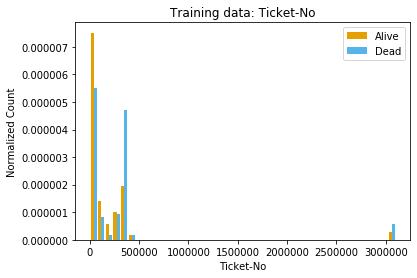

In [30]:
# Make a separate list for each survivor result
x1 = list(df[df['Survived'] == 1]["Ticket-No"])
x2 = list(df[df['Survived'] == 0]["Ticket-No"])
# Normalize the flights and assign colors and names
# Assign colors for each result and the names
colors = ['#E69F00', '#56B4E9']
names = ['Alive', 'Dead']
plt.hist([x1, x2], bins = 40, density=True,color = colors, label=names)
#plt.hist(titanic[num_data],align='mid',bins=40)
plt.title("Training data: " + "Ticket-No")
plt.xlabel("Ticket-No")
plt.ylabel("Normalized Count")
plt.legend()
plt.show()

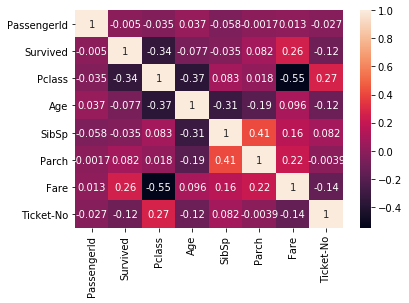

In [31]:
sns.heatmap(df.corr(),annot=True)

In [32]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Ticket-No
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,21171.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,17599.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,3101282.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,113803.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,373450.0


### Comments:
- It is found from the histogram that tickets which are numbered below 250,000 have the tendency to live more than those which is above the ticket number 250,000. Possible to cut the data into categories of <250,000 and >250,000.
- Additionally, there is probably a need to scale and normalize all the input variables so that large numeric variables like Ticket-No could be addressed (should this be a numeric variable and not binned)

#### 2. Name - Processing

In [33]:
#Possible to split the names up into Surnames and titles.
df["Last-Name"]=df.Name.str.rsplit(",", n=1, expand=True).loc[:,0]
df["Salutation"]=df.Name.str.split(".").str.get(0).str.split(",").str.get(-1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Ticket-No,Last-Name,Salutation
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,21171.0,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,17599.0,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,3101282.0,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,113803.0,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,373450.0,Allen,Mr


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    object 
 10  Ticket-No    886 non-null    float64
 11  Last-Name    891 non-null    object 
 12  Salutation   891 non-null    object 
dtypes: float64(3), int64(5), object(5)
memory usage: 90.6+ KB


[' Mr' ' Mrs' ' Miss' ' Master' ' Don' ' Rev' ' Dr' ' Mme' ' Ms' ' Major'
 ' Lady' ' Sir' ' Mlle' ' Col' ' Capt' ' the Countess' ' Jonkheer']


Text(0.5, 1.0, 'Count plot for different salutation')

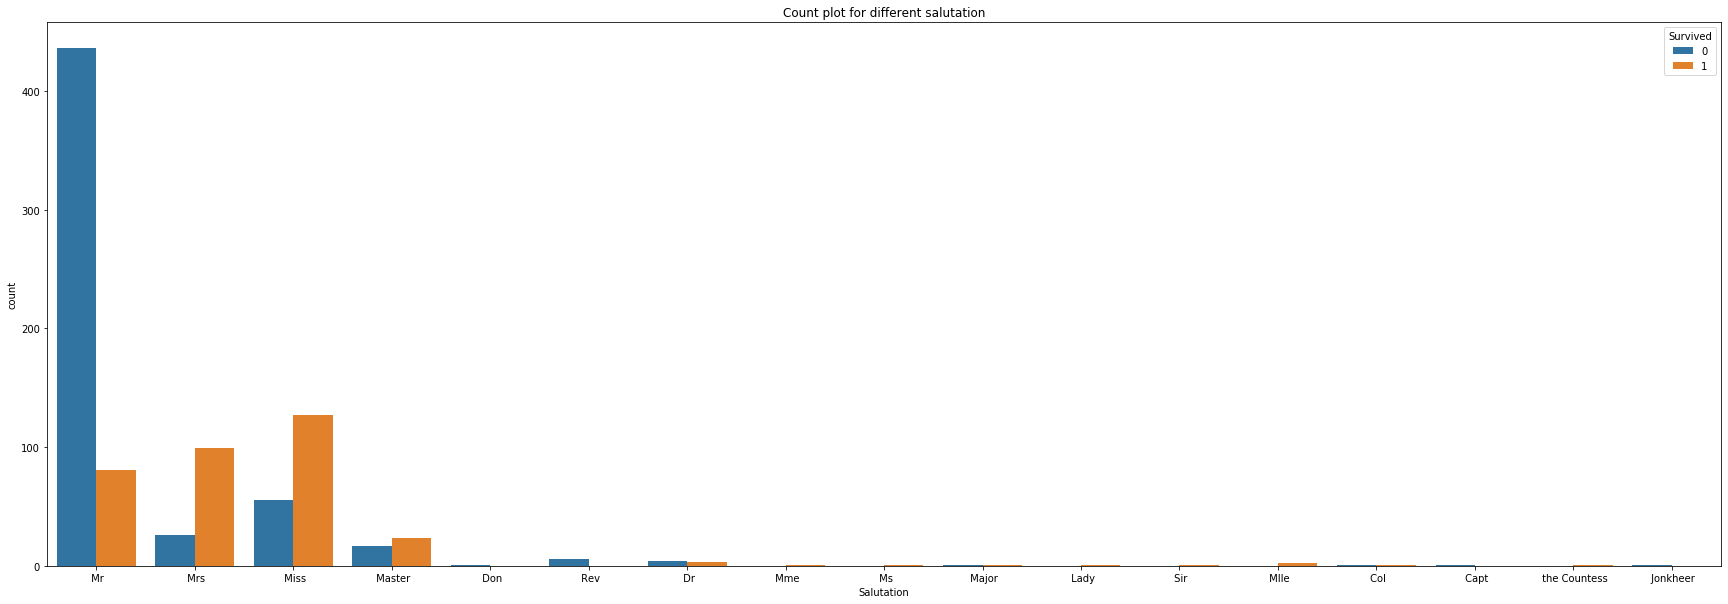

In [35]:
fig, ax = plt.subplots(figsize=[30,10])
sns.countplot(x="Salutation", hue="Survived", data=df, ax=ax)
print(df['Salutation'].unique()) #Notice that there is one extra "Mrs. Martin (Elizabeth :L" that is not a salutation
plt.title("Count plot for different salutation")

In [36]:
#First name checks if there's a purpose for the first names
totalSample = df.index.nunique()
countFN = df['Last-Name'].nunique()
print("Number of unique Last-Names: {}".format(countFN))
print("Number of unique Last-Names (%) of data: {:.2f}%".format(countFN/totalSample*100))

Number of unique Last-Names: 667
Number of unique Last-Names (%) of data: 74.86%


### Comments:
- Since 75% of the passsengers have unique last names or surnames, there might be little meaning to actually pick out discernably significant factors from this engineered variable. To drop Last-Names variable from the dataframe.
- Nonetheless, it is noticed that certain salutations or titles have greater survivor rates compared to others as shown in the histogram. We can see that males has greater portion of deaths than females which is also reflected in the gender variable but gender neutral salutations like Master and Mile have demonstrated substantial levels of survival rates too.

In [37]:
#Drop unnecessary columns
# Remove column name 'A'
df=df.drop(['Name','PassengerId','Last-Name'], axis = 1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Ticket-No,Salutation
0,0,3,male,22.0,1,0,7.2500,S,21171.0,Mr
1,1,1,female,38.0,1,0,71.2833,C,17599.0,Mrs
2,1,3,female,26.0,0,0,7.9250,S,3101282.0,Miss
3,1,1,female,35.0,1,0,53.1000,S,113803.0,Mrs
4,0,3,male,35.0,0,0,8.0500,S,373450.0,Mr


#### 3. Data Cleaning (Null/Missing Values)

In [38]:
print(df.isnull().sum())
df.info()

Survived        0
Pclass          0
Sex             0
Age           177
SibSp           0
Parch           0
Fare            0
Embarked        2
Ticket-No       5
Salutation      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    object 
 3   Age         714 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked    889 non-null    object 
 8   Ticket-No   886 non-null    float64
 9   Salutation  891 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 69.7+ KB


In [39]:
# 1. Embarked: 2 missing values in the embarked
# use the mode to replace it
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
print(df.isnull().sum())
df.info()

Survived        0
Pclass          0
Sex             0
Age           177
SibSp           0
Parch           0
Fare            0
Embarked        0
Ticket-No       5
Salutation      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    object 
 3   Age         714 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked    891 non-null    object 
 8   Ticket-No   886 non-null    float64
 9   Salutation  891 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 69.7+ KB


In [40]:
# 2 Age: 177 missing values in the embarked
# use the mode to replace it
df['Age'].fillna(df['Age'].mean(), inplace=True)
print(df.isnull().sum())
df.info()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Ticket-No     5
Salutation    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    object 
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked    891 non-null    object 
 8   Ticket-No   886 non-null    float64
 9   Salutation  891 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 69.7+ KB


In [41]:
# 3 Ticket Number: 5 missing values in the embarked
# use the mode to replace it
df['Ticket-No'].fillna(df['Ticket-No'].median(), inplace=True)
print(df.isnull().sum())
df.info()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Ticket-No     0
Salutation    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    object 
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked    891 non-null    object 
 8   Ticket-No   891 non-null    float64
 9   Salutation  891 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 69.7+ KB


#### 3a. Data Transformation: Age/Ticket Binning

In [42]:
#Age Binning
def make_agebins(df):
   label_names = ["Children", "Adults"]
   cut_points = [0,15, 99] #Binned cut off at 45
   df["AgeBinned"] = pd.cut(df["Age"], cut_points, labels=label_names)
   return df

new_df = make_agebins(df)

In [43]:
new_df.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Ticket-No,Salutation,AgeBinned
886,0,2,male,27.000000,0,0,13.00,S,211536.0,Rev,Adults
887,1,1,female,19.000000,0,0,30.00,S,112053.0,Miss,Adults
888,0,3,female,29.699118,1,2,23.45,S,6607.0,Miss,Adults
889,1,1,male,26.000000,0,0,30.00,C,111369.0,Mr,Adults
890,0,3,male,32.000000,0,0,7.75,Q,370376.0,Mr,Adults


In [44]:
print(new_df.isnull().sum())
new_df.describe()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Ticket-No     0
Salutation    0
AgeBinned     0
dtype: int64


,Survived,Pclass,Age,SibSp,Parch,Fare,Ticket-No
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,8.910000e+02
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,2.558452e+05
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,5.692731e+05
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,2.000000e+00
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,1.354900e+04
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.113405e+05
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,3.470735e+05
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,3.101317e+06


In [45]:
#Ticket Binning
def make_tickbins(df):
   label_names = ["Low", "High"]
   cut_points = [0,250000, 4e+06] #Binned cut off at 45
   df["TicketNoBinned"] = pd.cut(df["Ticket-No"], cut_points, labels=label_names)
   return df

new_df = make_tickbins(df)
new_df.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Ticket-No,Salutation,AgeBinned,TicketNoBinned
886,0,2,male,27.000000,0,0,13.00,S,211536.0,Rev,Adults,Low
887,1,1,female,19.000000,0,0,30.00,S,112053.0,Miss,Adults,Low
888,0,3,female,29.699118,1,2,23.45,S,6607.0,Miss,Adults,Low
889,1,1,male,26.000000,0,0,30.00,C,111369.0,Mr,Adults,Low
890,0,3,male,32.000000,0,0,7.75,Q,370376.0,Mr,Adults,High


In [46]:
#Drop binned features
new_df=df.drop(['Ticket-No','Age'], axis = 1)
new_df.head()
print(new_df.isnull().sum())
new_df

Survived          0
Pclass            0
Sex               0
SibSp             0
Parch             0
Fare              0
Embarked          0
Salutation        0
AgeBinned         0
TicketNoBinned    0
dtype: int64


,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Salutation,AgeBinned,TicketNoBinned
0,0,3,male,1,0,7.2500,S,Mr,Adults,Low
1,1,1,female,1,0,71.2833,C,Mrs,Adults,Low
2,1,3,female,0,0,7.9250,S,Miss,Adults,High
3,1,1,female,1,0,53.1000,S,Mrs,Adults,Low
4,0,3,male,0,0,8.0500,S,Mr,Adults,High
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,S,Rev,Adults,Low
887,1,1,female,0,0,30.0000,S,Miss,Adults,Low
888,0,3,female,1,2,23.4500,S,Miss,Adults,Low
889,1,1,male,0,0,30.0000,C,Mr,Adults,Low


## <span id="4"></span> 4. Training Model
[Back to Main](#0)

Purpose: Now that null values are removed/replaced, the goal of training a model is to find a set of weights and biases that have low loss, on average, across all examples. shows a high loss model on the left and a low loss model on the right. To prepare dataset in the sklearnpipeline models with the following methods: 
- Normalization/Standardization of numerical feature variables to <10 (e.g. Fare)
- Onehot encoding for categorical feature variables (e.g. Saluation/AgeBinned/TicketNoBinned/Sex/PClass/Embarked)
- K-Fold GridSearchCV of the dataset (Hyperparameter Tuning cv=10)
- Modelling Pipeline
- Classification using threshold optimization (t) as final model improvement attempts

The classification models that we will testing are as follows:
1. Logistic Regression (Simple)
2. Logistic Regression + GridSearchCV
3. XGBoost Classifier + GridSearchCV
4. Random Forest Classification + GridSearchCV
5. Naive Bayes Classifier + GridSearchCV
6. KNN Classifier + GridSearchCV

In [47]:
new_df.describe()

,Survived,Pclass,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.523008,0.381594,32.204208
std,0.486592,0.836071,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,8.000000,6.000000,512.329200


In [48]:
catfeat = ["Sex","Pclass","AgeBinned","TicketNoBinned","Salutation","Embarked"] #Categorical Features
numfeat = ["SibSp","Fare","Parch"] #Numerical
response = ["Survived"]

In [49]:
X = new_df.drop(['Survived'],axis=1)  # independant features
y = new_df['Survived']					# dependant variable

#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) #random state = 1
X_train.head()


,Pclass,Sex,SibSp,Parch,Fare,Embarked,Salutation,AgeBinned,TicketNoBinned
301,3,male,2,0,23.2500,Q,Mr,Adults,High
309,1,female,0,0,56.9292,C,Miss,Adults,Low
516,2,female,0,0,10.5000,S,Mrs,Adults,Low
120,2,male,2,0,73.5000,S,Mr,Adults,Low
570,2,male,0,0,10.5000,S,Mr,Adults,Low


### Function: To conduct model evaluation and visualization

In [50]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    """
    Modified from:
    Hands-On Machine learning with Scikit-Learn
    and TensorFlow; p.89
    """
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')
    
#Model Evaluation Function
def modelEval(model,y_test,X_test,name,threshold=None):
    if threshold == None:
        y_hat=model.predict(X_test)
        print("Threshold is default at 0.5")
    else:
        y_scores = model.predict_proba(X_test)[:, 1]
        y_pred_with_threshold = (y_scores >= threshold).astype(int)
        y_hat=y_pred_with_threshold
        print("Threshold is manually set at: {}".format(threshold))
    # evaluate model for test set
    class_names=["Survived","Died"]
    cm = confusion_matrix(y_test, y_hat, labels=[1,0])
    df_cm = pd.DataFrame(cm, columns=class_names, index = class_names)
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    plt.figure(figsize = (6,5))
    sns.set(font_scale=1.4)#for label size
    sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

    # Accuracy score for test set
    score = accuracy_score(y_test, y_hat)
    f1Score = f1_score(y_test, y_hat)
    print("Accuracy (Test): {:.2f}%".format(score*100))
    print("F1-Score (Test): {:.2f}".format(f1Score))

    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr) #AUC values higher the better

    #Plotting ROC Curve
    plt.figure()
    plt.plot(fpr, tpr, label='{} (area = {:.2f})'.format(name,roc_auc))
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

    #Illustrating the decision threshold impact on precision and recall
    y_scores = model.predict_proba(X_test)[:, 1]
    p, r, thresholds = precision_recall_curve(y_test, y_scores)
    plot_precision_recall_vs_threshold(p, r, thresholds)
    return score,f1Score



### Function: Generate the feature names post-Column Transformation

In [51]:
#Creating a function to pull features from column transformer in pipeline easily

def get_feature_names(column_transformer):
    """Get feature names from all transformers.
    Returns
    -------
    feature_names : list of strings
        Names of the features produced by transform.
    """
    # Remove the internal helper function
    #check_is_fitted(column_transformer)
    
    # Turn loopkup into function for better handling with pipeline later
    def get_names(trans):
        # >> Original get_feature_names() method
        if trans == 'drop' or (
                hasattr(column, '__len__') and not len(column)):
            return []
        if trans == 'passthrough':
            if hasattr(column_transformer, '_df_columns'):
                if ((not isinstance(column, slice))
                        and all(isinstance(col, str) for col in column)):
                    return column
                else:
                    return column_transformer._df_columns[column]
            else:
                indices = np.arange(column_transformer._n_features)
                return ['x%d' % i for i in indices[column]]
        if not hasattr(trans, 'get_feature_names'):
        # >>> Change: Return input column names if no method avaiable
            # Turn error into a warning
            warnings.warn("Transformer %s (type %s) does not "
                                 "provide get_feature_names. "
                                 "Will return input column names if available"
                                 % (str(name), type(trans).__name__))
            # For transformers without a get_features_names method, use the input
            # names to the column transformer
            if column is None:
                return []
            else:
                return [name + "__" + f for f in column]

        return [name + "__" + f for f in trans.get_feature_names()]
    
    ### Start of processing
    feature_names = []
    
    # Allow transformers to be pipelines. Pipeline steps are named differently, so preprocessing is needed
    if type(column_transformer) == sklearn.pipeline.Pipeline:
        l_transformers = [(name, trans, None, None) for step, name, trans in column_transformer._iter()]
    else:
        # For column transformers, follow the original method
        l_transformers = list(column_transformer._iter(fitted=True))
    
    
    for name, trans, column, _ in l_transformers: 
        if type(trans) == sklearn.pipeline.Pipeline:
            # Recursive call on pipeline
            _names = get_feature_names(trans)
            # if pipeline has no transformer that returns names
            if len(_names)==0:
                _names = [name + "__" + f for f in column]
            feature_names.extend(_names)
        else:
            feature_names.extend(get_names(trans))
    
    return feature_names

### 1. Logistic Regression (Test)

Accuracy (Training): 80.45%
['num__SibSp', 'num__Fare', 'num__Parch', 'cat__x0_female', 'cat__x0_male', 'cat__x1_1', 'cat__x1_2', 'cat__x1_3', 'cat__x2_Adults', 'cat__x2_Children', 'cat__x3_High', 'cat__x3_Low', 'cat__x4_ Capt', 'cat__x4_ Col', 'cat__x4_ Don', 'cat__x4_ Dr', 'cat__x4_ Lady', 'cat__x4_ Major', 'cat__x4_ Master', 'cat__x4_ Miss', 'cat__x4_ Mlle', 'cat__x4_ Mme', 'cat__x4_ Mr', 'cat__x4_ Mrs', 'cat__x4_ Rev', 'cat__x4_ the Countess', 'cat__x5_C', 'cat__x5_Q', 'cat__x5_S']
Threshold is default at 0.5
Accuracy (Test): 80.45%
F1-Score (Test): 0.74


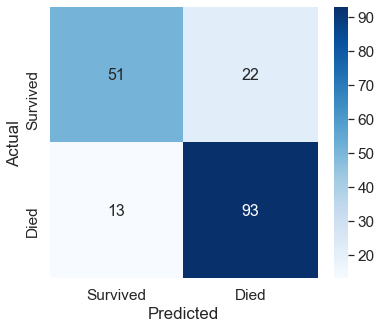

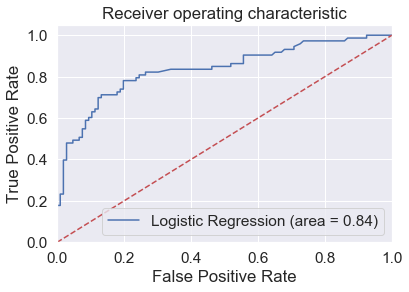

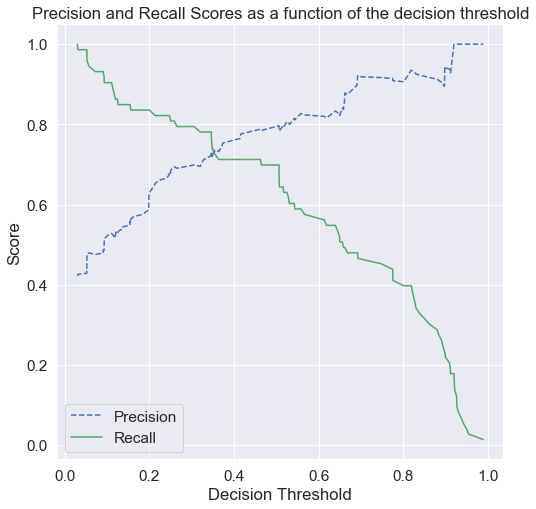

In [52]:
#0. Variable Model (To Change)
model = LogisticRegression(random_state=42)
model_name = "Logistic Regression"

preprocessor = ColumnTransformer(
    transformers=[
        ("num", RobustScaler(), numfeat), #preprocessing the numerical feat (Std Scalar)
        ("cat", OneHotEncoder(handle_unknown="ignore"), catfeat) #preprocessing the categorical feat (one-Hot)
    ]
)

pipeline = Pipeline(
    steps=[("preprocessor", preprocessor), ("model", model )]
)

pipeline.fit(X_train, y_train)
print("Accuracy (Training): {:.2f}%".format(pipeline.score(X_test, y_test)*100))
columns = get_feature_names(preprocessor)
print(columns)

#0. Variable Model (To Change)
LogReg,LogRegf1=modelEval(pipeline,y_test,X_test,model_name)


#### Check on Post-Preprocessor Dataframe

In [53]:
x_values=preprocessor.fit_transform(X_train)
columns
xdf = pd.DataFrame(data = x_values, columns = columns)
print(xdf.describe())
xdf.head()

       num__SibSp   num__Fare  num__Parch  cat__x0_female  cat__x0_male  \
count  712.000000  712.000000  712.000000      712.000000    712.000000   
mean     0.494382    0.767249    0.370787        0.349719      0.650281   
std      1.010478    2.031313    0.775968        0.477216      0.477216   
min      0.000000   -0.634136    0.000000        0.000000      0.000000   
25%      0.000000   -0.287829    0.000000        0.000000      0.000000   
50%      0.000000    0.000000    0.000000        0.000000      1.000000   
75%      1.000000    0.712171    0.000000        1.000000      1.000000   
max      8.000000   21.836443    6.000000        1.000000      1.000000   

        cat__x1_1   cat__x1_2   cat__x1_3  cat__x2_Adults  cat__x2_Children  \
count  712.000000  712.000000  712.000000      712.000000        712.000000   
mean     0.244382    0.210674    0.544944        0.908708          0.091292   
std      0.430022    0.408074    0.498326        0.288227          0.288227   
min     

,num__SibSp,num__Fare,num__Parch,cat__x0_female,cat__x0_male,cat__x1_1,cat__x1_2,cat__x1_3,cat__x2_Adults,cat__x2_Children,...,cat__x4_ Miss,cat__x4_ Mlle,cat__x4_ Mme,cat__x4_ Mr,cat__x4_ Mrs,cat__x4_ Rev,cat__x4_ the Countess,cat__x5_C,cat__x5_Q,cat__x5_S
0,2.0,0.385601,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.862759,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,-0.173610,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,2.0,2.589548,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,-0.173610,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


### Comments:
- Using the column transformer feature extraction function, we can see the post-preprocessor dataframe that will then be fed into the models. This is to ensure that the numerical features are standardized (especially Fare) and also the categorical features have been encoded properly. In the case, all functions have been fulfilled.

### 1. Logistic Regression (with Grid Search)

Best params:
{'model__C': 1.0}
Accuracy (Training-Best Params): 83.55%
Threshold is default at 0.5
Accuracy (Test): 80.45%
F1-Score (Test): 0.74


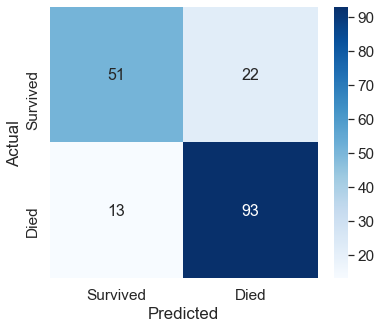

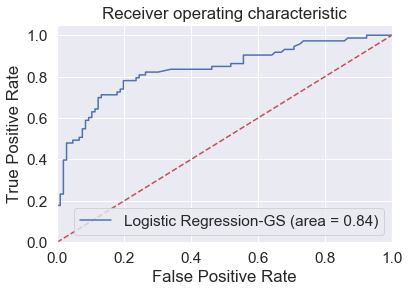

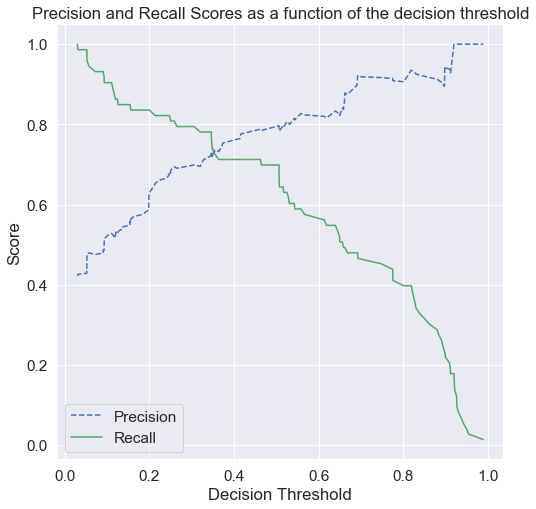

In [54]:
#2. Pre-Processing Parameters to Hyperparameter Search
model_name = "Logistic Regression-GS"

param_grid = {
    "model__C": [0.1, 1.0, 10, 100], #Parameter for logistic Regression
}

def GridSearchOp(pipeline,param_grid,cvv):
    grid_search = GridSearchCV(pipeline, param_grid, cv=cvv,n_jobs=-1, scoring='roc_auc',verbose=False)
    best_model = grid_search.fit(X_train, y_train) #Training Set
    print("Best params:")
    print(grid_search.best_params_)
    print("Accuracy (Training-Best Params): {:.2f}%".format(grid_search.score(X_test, y_test)*100))
    return best_model

#Optimization of Data Model (GridSearch)
best_modelloggs = GridSearchOp(pipeline,param_grid,10)

#Test Set Model Performance
LogReg_GS,LogReg_GSf1=modelEval(best_modelloggs,y_test,X_test, model_name)

#### Finding Best Threshold

Text(0, 0.5, 'F1-Score')

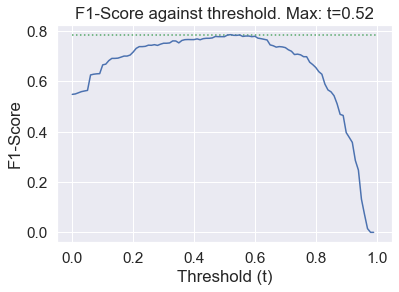

In [55]:
#Finding the best threshold value
f1_scoreList=[]
thresholdList = []

for t in np.arange(0, 1, 0.01):
  y_scores = best_modelloggs.predict_proba(X_train)[:, 1]
  y_pred_with_threshold = (y_scores >= t).astype(int)
  y_hat=y_pred_with_threshold
  f1Score = f1_score(y_train, y_hat)
  #append f1 scores
  f1_scoreList.append(f1Score)
  thresholdList.append(t)

index = f1_scoreList.index(max(f1_scoreList))
plt.plot(thresholdList,f1_scoreList)
plt.hlines(max(f1_scoreList), 0, 1, colors="g", linestyles='dotted')
plt.title("F1-Score against threshold. Max: t={:.2f}".format(thresholdList[index]))
plt.xlabel("Threshold (t)")
plt.ylabel("F1-Score")

Text(0.5, 1.0, 'Visualized Feature Importance: Logistic Regression-GS')

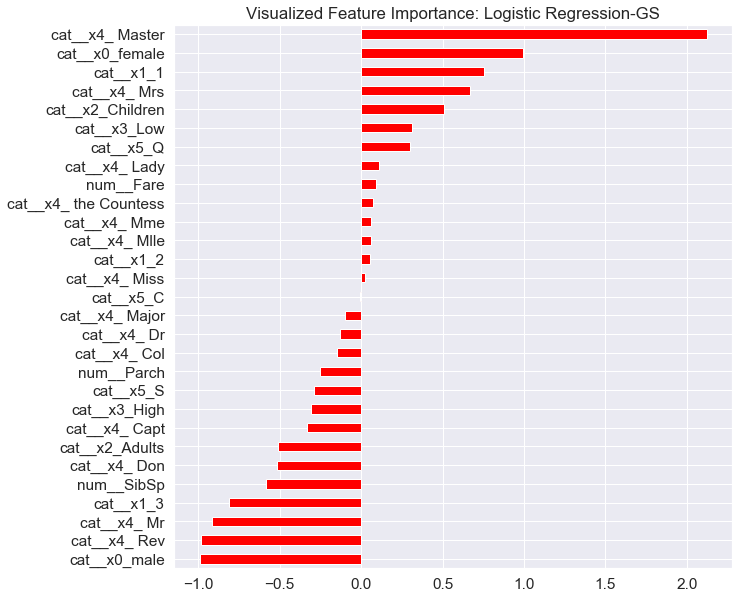

In [56]:
#Plotting feature importances
featModel = best_modelloggs.best_estimator_.named_steps["model"]
importance = featModel.coef_[0]
#importance is a list so you can plot it. 
combination = pd.Series(importance,columns)
feat_importances = pd.Series(importance)
plt.figure(figsize=(10,10))
combination.sort_values().plot.barh(color='red')
plt.title("Visualized Feature Importance: {}".format(model_name))

### Comments:

- Logistic Regression coefficient interpretation: a 1 unit increase in X₁ will result in b increase in the log-odds ratio of success : failure.
- For Logistic Regression optimized with threshold and hyperparameter, we can see that titles, gender and age tend to increase once's changes for the odds of success - Young, Female and High Status would greatly increase your odds of survival. On the other hand those coefficients which are negative will result in increased odds of death.

### 2. XGBoost (with GridSearchCV)

Best params:
{'model__learning_rate': 0.01, 'model__max_depth': 5, 'model__n_estimators': 500}
Accuracy (Training-Best Params): 85.28%
Threshold is default at 0.5
Accuracy (Test): 79.89%
F1-Score (Test): 0.72


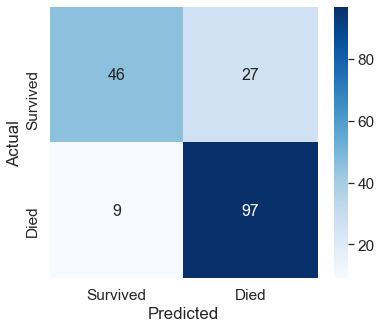

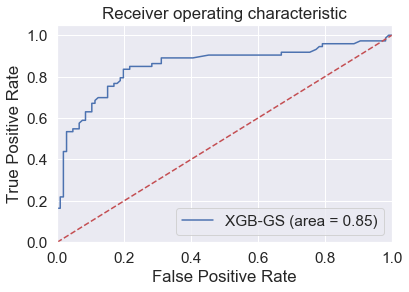

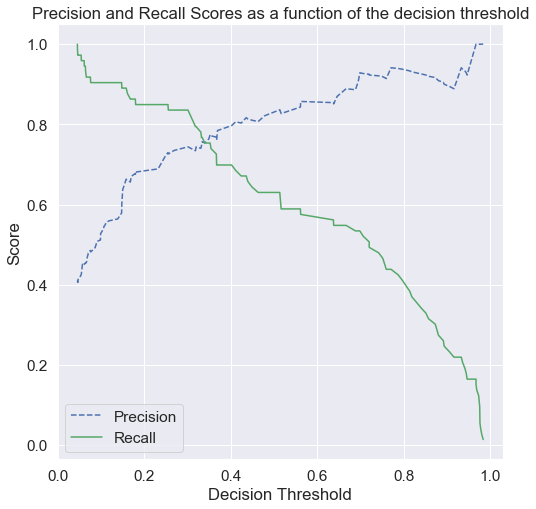

In [57]:
import xgboost as xgb

#0. Variable Model (To Change)
model = xgb.XGBClassifier()

#1. Creating the model pipeline
pipeline = Pipeline(
    steps=[("preprocessor", preprocessor), ('model', model)]
)

#2. Pre-Processing Parameters to Hyperparameter Search
param_grid = {
    'model__max_depth': [2, 3, 5, 7, 10],
    'model__n_estimators': [10, 100, 500],
    'model__learning_rate': [0.1, 0.01, 0.05, 0.07]
}

best_modelxg = GridSearchOp(pipeline,param_grid,10)

#B. ROC Curve Visualization:
XGB_GS,XGB_GSf1=modelEval(best_modelxg,y_test,X_test, "XGB-GS")

#### Finding Best Threshold

Text(0, 0.5, 'F1-Score')

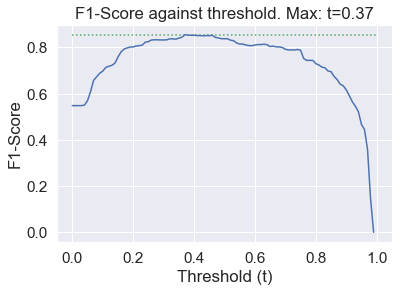

In [58]:
#Finding the best threshold value
f1_scoreList=[]
thresholdList = []

for t in np.arange(0, 1, 0.01):
  y_scores = best_modelxg.predict_proba(X_train)[:, 1]
  y_pred_with_threshold = (y_scores >= t).astype(int)
  y_hat=y_pred_with_threshold
  f1Score = f1_score(y_train, y_hat)
  #append f1 scores
  f1_scoreList.append(f1Score)
  thresholdList.append(t)

index = f1_scoreList.index(max(f1_scoreList))
plt.plot(thresholdList,f1_scoreList)
plt.hlines(max(f1_scoreList), 0, 1, colors="g", linestyles='dotted')
plt.title("F1-Score against threshold. Max: t={:.2f}".format(thresholdList[index]))
plt.xlabel("Threshold (t)")
plt.ylabel("F1-Score")

### 3. Random Forest (with GridSearchCV)

Best params:
{'model__criterion': 'gini', 'model__max_features': 'log2', 'model__n_estimators': 1000}
Accuracy (Training-Best Params): 83.18%
[6.48606864e-02 2.87380970e-01 4.41851131e-02 9.85269731e-02
 8.94016774e-02 2.88399960e-02 1.87966792e-02 5.48050550e-02
 1.60256378e-02 1.62408375e-02 1.86179060e-02 1.91446007e-02
 1.05526919e-03 1.79398435e-03 1.26315298e-03 2.86959762e-03
 1.62303227e-04 1.18785862e-03 1.45121458e-02 2.86239751e-02
 1.02756988e-04 1.11638553e-04 1.13713298e-01 3.15143945e-02
 3.08000151e-03 1.65747643e-04 1.27065607e-02 1.13893984e-02
 1.89217852e-02]
29
Threshold is default at 0.5
Accuracy (Test): 75.42%
F1-Score (Test): 0.67


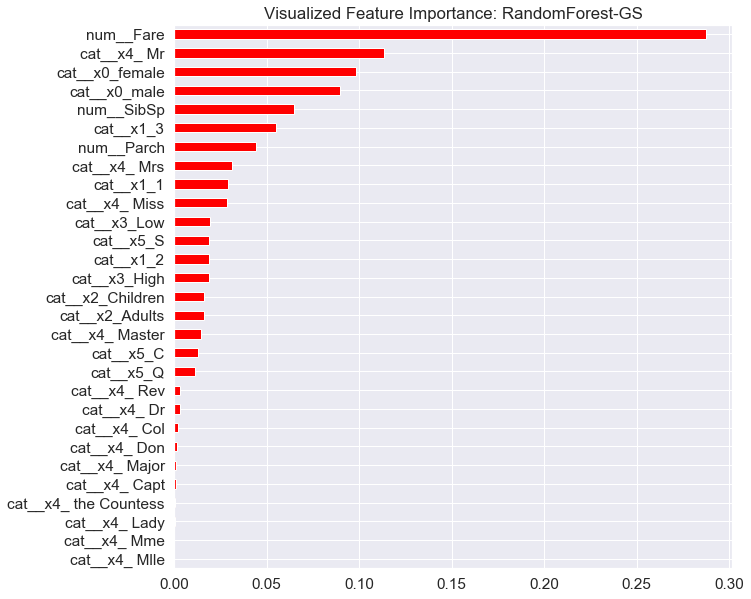

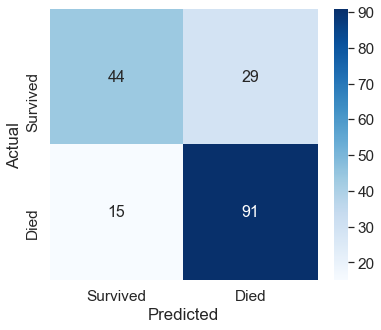

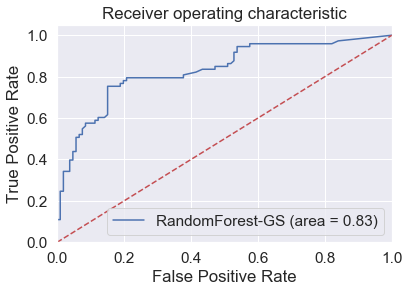

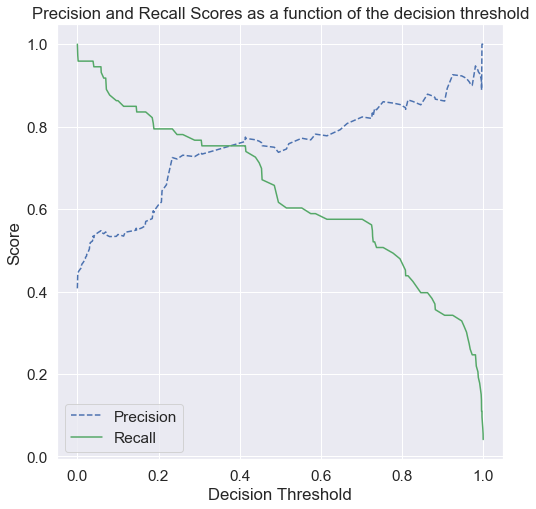

In [59]:
from sklearn.ensemble import RandomForestClassifier

# Create first pipeline for base without reducing features.

model = RandomForestClassifier(random_state=42)
model_name = "RandomForest-GS"

# Create param grid.
#1. Creating the model pipeline
pipeline = Pipeline(
    steps=[("preprocessor", preprocessor), ('model', model)]
)

param_grid = [
    {'model__n_estimators': [200, 500, 1000],
    'model__max_features': ['sqrt', 'log2'],
    'model__criterion' :['gini', 'entropy', 'log_loss']}
]

best_modelrf = GridSearchOp(pipeline,param_grid,10)

#Plotting feature importances
featModel = best_modelrf.best_estimator_.named_steps["model"]
importance = featModel.feature_importances_
print(importance)
print(len(importance))
combination = pd.Series(importance,columns)
plt.figure(figsize=(10,10))
combination.sort_values().plot.barh(color='red')
plt.title("Visualized Feature Importance: {}".format(model_name))

#Test Set Model Performance
RF_GS,RF_GSf1=modelEval(best_modelrf,y_test,X_test,model_name)



### Comments:

- Feature importance for random forest classifier is based on the Gini impurity. Based on the feature importance table, we can see that gender and fare rates are selected as one of the main roots of the decision tree. 

### 4. Naive Bayes Classifier (with GridSearchCV)

Best params:
{'model__var_smoothing': 0.01}
Accuracy (Training-Best Params): 83.14%
Threshold is default at 0.5
Accuracy (Test): 79.33%
F1-Score (Test): 0.73


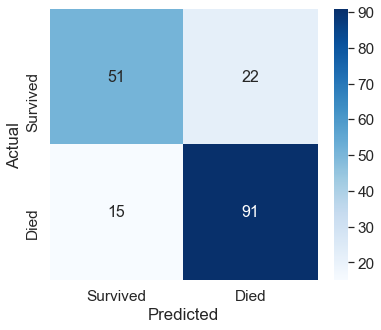

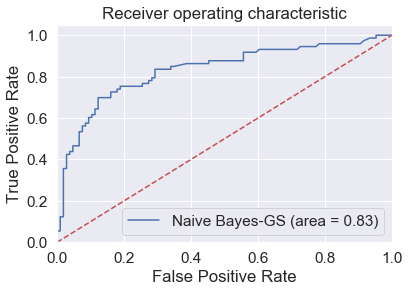

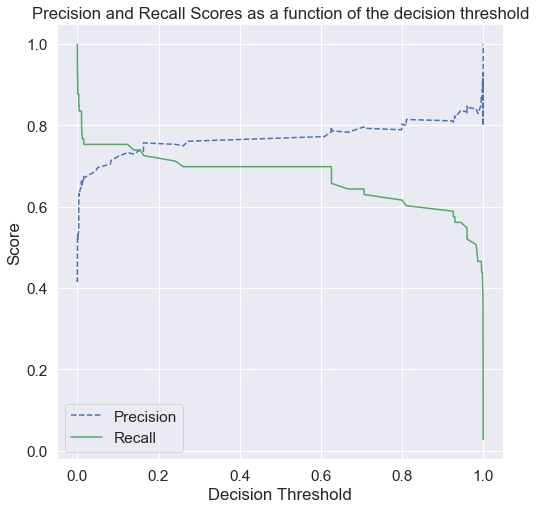

In [60]:
from sklearn.naive_bayes import GaussianNB

# Create first pipeline for base without reducing features.

model = GaussianNB()
model_name = "Naive Bayes-GS"

# Create param grid.
#1. Creating the model pipeline
pipeline = Pipeline(
    steps=[("preprocessor", preprocessor), ('model', model)]
)

param_grid = [
    {'model__var_smoothing': np.logspace(0,-9, num=100)}
]

best_modelnb = GridSearchOp(pipeline,param_grid,10)

#Test Set Model Performance
NB_GS,NB_GSf1=modelEval(best_modelnb,y_test,X_test, model_name)


### 5. KNN (with GridSearchCV)

Best params:
{'model__algorithm': 'kd_tree', 'model__leaf_size': 30, 'model__n_neighbors': 28}
Accuracy (Training-Best Params): 84.72%
Threshold is default at 0.5
Accuracy (Test): 78.77%
F1-Score (Test): 0.69


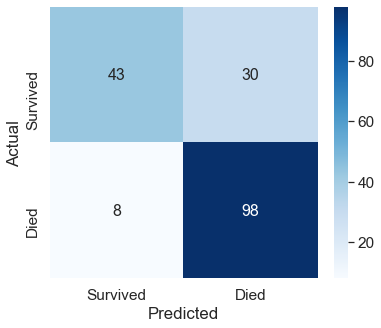

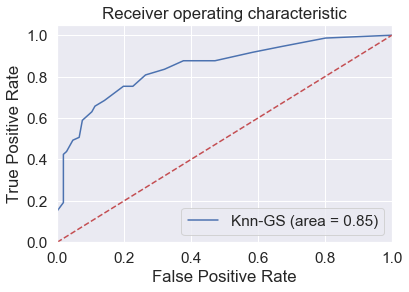

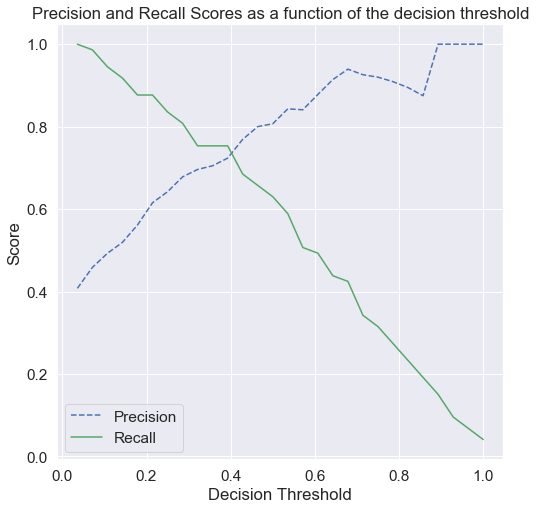

In [61]:
from sklearn.neighbors import KNeighborsClassifier

# Create first pipeline for base without reducing features.

model = KNeighborsClassifier()
model_name = "Knn-GS"

# Create param grid.
#1. Creating the model pipeline
pipeline = Pipeline(
    steps=[("preprocessor", preprocessor), ('model', model)]
)

param_grid = [
    {'model__n_neighbors': list(range(1, 31)),
     'model__algorithm':['ball_tree', 'kd_tree','brute'],
     'model__leaf_size': [30,60,90,120]
    }
]

best_modelknn = GridSearchOp(pipeline,param_grid,10)

#Test Set Model Performance
KnnGS,KnnGSf1=modelEval(best_modelknn,y_test,X_test, model_name)

## <span id="5"></span> 5. Score & Evaluate Model: Logistics Regression (Hyper/Threshold Tuned)
[Back to Main](#0)

<ins>Metrics: F1-Score</ins>

Models are evaluated by the test accuracy and the F1-score. The F1-score combines the precision and recall of a classifier into a single metric by taking their harmonic mean. It elegantly sums up the predictive performance of a model by combining two otherwise competing metrics — precision and recall. As the case study does not emphasize which False Positive (FP) or False Negative (FN) are better, F1-score can be used.

<ins>Metrics: AUC-ROC Curve</ins>

AUC - ROC curve is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. The higher the AUC, the better the model is at distinguishing between Survived (1) and Dead (0) passengers. When AUC is 0.7, it means there is a 70% chance that the model will be able to distinguish between positive class and negative class. 

Text(0, 0.5, 'Scores')

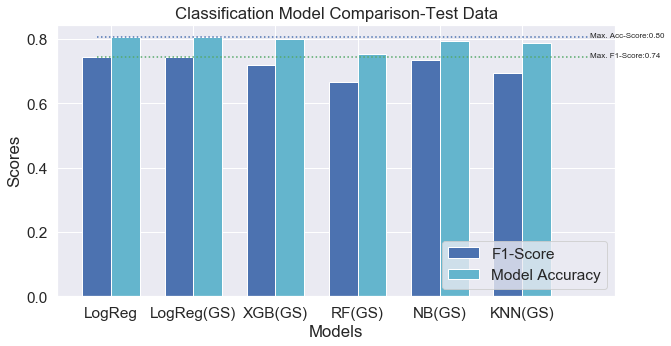

In [62]:
modelLabels = ["LogReg","LogReg(GS)","XGB(GS)","RF(GS)","NB(GS)","KNN(GS)"]
#F-score (Classification)
modelF1Score = [LogRegf1,LogReg_GSf1,XGB_GSf1,RF_GSf1,NB_GSf1,KnnGSf1]
#Accuracy (Classification)
modelAccScore = [LogReg,LogReg_GS,XGB_GS,RF_GS,NB_GS,KnnGS]

ind = np.arange(len(modelLabels))  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots(figsize=(10,5))
rects1 = plt.bar(ind, modelF1Score, width, color='b')
rects2 = plt.bar(ind + width, modelAccScore, width, color='c')

ax.set_xticks(ind + width / 2)
ax.set_xticklabels((modelLabels))

plt.hlines(max(modelF1Score), 0, len(modelLabels), colors="g", linestyles='dotted')
ax.text(len(modelLabels), max(modelF1Score), 'Max. F1-Score:{:.2f}'.format(max(modelF1Score)), fontsize=8)
plt.hlines(max(modelAccScore), 0, len(modelLabels), colors="b", linestyles='dotted')
ax.text(len(modelLabels), max(modelAccScore), 'Max. Acc-Score:{:.2f}'.format(max(modelAccScore)), fontsize=8)

ax.legend((rects1[0], rects2[0]), ('F1-Score', 'Model Accuracy'),loc='lower right')
plt.title("Classification Model Comparison-Test Data")
plt.xlabel("Models")
plt.ylabel("Scores")


### Comments:
- Due to the data imbalance where the number of dead is much larger than those who survived, adjusting the decision threshold may help to improve the F1-Scores.
- Seems like the most common logistic regression model is scoring the best score in both F1 scores and the accuracy. Another models that are comparable will be the Naive Bayes (NB) model which seems to be similar in performance for accuracy and F1-Scores as well for the test set. All models have similar AUC scores at about 0.83 to 0.85, where logistic regression is at 0.84.

## <span id="6"></span> 6. Kaggle Submission: Logistics Regression (Hyper/Threshold Tuned)
[Back to Main](#0)

In [63]:
#loading test dataset
test_datalink = r"data\titanic\test.csv"
test = pd.read_csv(test_datalink)
test.head(10)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


In [64]:
#Creating duplicated dataframe for feature engineering
df = test.copy()

#Dropping unwanted columns
df = df.drop('Cabin', 1)

#Feature Engineering
df[['Ticket-Alpha', 'Ticket-No','Test']] = df['Ticket'].str.split(' ', expand=True)
df.loc[(df['Ticket-Alpha'].str.isnumeric()),['Ticket-No']]=df.loc[(df['Ticket-Alpha'].str.isnumeric()), ['Ticket-Alpha']]
df['Ticket-Alpha']=pd.to_numeric(df['Ticket-Alpha'],errors='coerce') #Converts non-numeric to NaN
df['Ticket-No']=df['Ticket-No'].combine_first(df['Ticket-Alpha']) #Combine and replace all the NaNs
df=df.drop(columns=['Ticket-Alpha', 'Test','Ticket'])
df['Ticket-No']=pd.to_numeric(df['Ticket-No'],errors='coerce') #Converts non-numeric to NaN
df[df["Ticket-No"]==np.nan] #Non thati is non-numeric yet, there are still some null values. Weird
df["Last-Name"]=df.Name.str.rsplit(",", n=1, expand=True).loc[:,0]
df["Salutation"]=df.Name.str.split(".").str.get(0).str.split(",").str.get(-1)

# Remove column name 'A'
df=df.drop(['Name','PassengerId','Last-Name'], axis = 1)
# Fill Missing Data
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Ticket-No'].fillna(df['Ticket-No'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].mean(), inplace=True)

# Binning of Numeric Data
test_df = make_agebins(df)
test_df = make_tickbins(df)
test_df.describe()
test_df=df.drop(['Ticket-No','Age'], axis = 1)

#Check Data is cleaned
print(test_df.isnull().sum())
test_df.head()

Pclass            0
Sex               0
SibSp             0
Parch             0
Fare              0
Embarked          0
Salutation        0
AgeBinned         0
TicketNoBinned    0
dtype: int64


,Pclass,Sex,SibSp,Parch,Fare,Embarked,Salutation,AgeBinned,TicketNoBinned
0,3,male,0,0,7.8292,Q,Mr,Adults,High
1,3,female,1,0,7.0000,S,Mrs,Adults,High
2,2,male,0,0,9.6875,Q,Mr,Adults,Low
3,3,male,0,0,8.6625,S,Mr,Adults,High
4,3,female,1,1,12.2875,S,Mrs,Adults,High


In [65]:
#Model Prediction
#Logistic Regression (with GridSearch)
t= 0.52 #Optimized threshold

y_scores = best_modelloggs.predict_proba(test_df)[:, 1]
y_pred_with_threshold = (y_scores >= t).astype(int)
y_hat=y_pred_with_threshold

In [66]:
#Export and Submission
dfout = pd.DataFrame() 
dfout[["PassengerId"]] = test[["PassengerId"]]
dfout["Survived"] = y_hat
dfout

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [67]:
dfout.to_csv("predict.csv",index=False)

### Stupid Baseline Score:
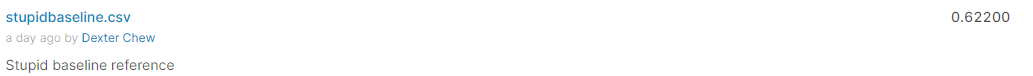

### Best Submission Score:
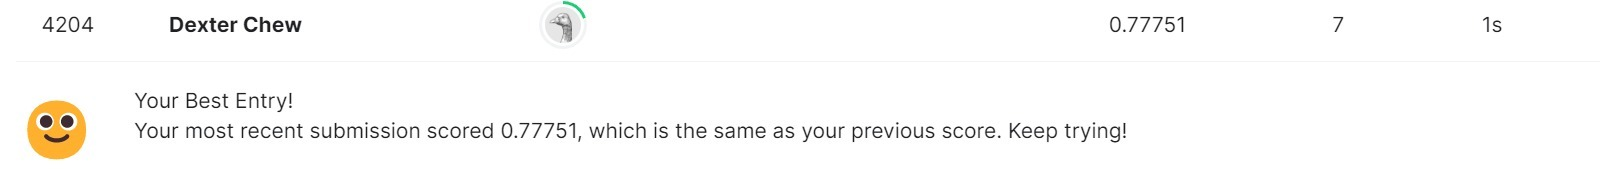

## <span id="7"></span> 7. Conclusion
[Back to Main](#0)

- The best model for this excercise that yields the highest accuracy test score is Linear Regression with GridSearchCV optimized hyperparameters (C = 1.0) and threshold at t=0.52.
- Compared to baseline stupid score, it's a 15% improvement to the model accuracy. However, there are limitations in getting towards the higher percentages even with other models.
- From the confusion matrices across all the models, we can see a trend where FN scores are really low (i.e. the model tends to predict that the passengers will die). This might be because most of the data are actually having passengers passing on (i.e. ~60%). It might be possible that if the proportion of data support survival rates are balanced then the model would yield better accuracies.
- One interesting aspect in common is that gender is definitely a significant factor in affecting survivability of the individual as mentioned in previous sections (e.g. XGBoost and Logistic Regression are coherent in this statement).

<ins>Other Matters</ins>
- Seems like optimizing the threshold doesn't yield significant improvements as most models lie at t=0.5. Interesting for XGBoost model, tuning the threshold will result in poor performance. However, improvements to the logstic regression was seen even with the minor tweaks to the value of the threshold, t. from t=0.5 to t=0.52 had a better performance for logistic regression.
- The effects of thresholding optimization is relevant in this dataset because the dataset is highly skewed in terms of the end result, where most of the individuals will pass on.
- Robustscalar only helped marginally to improve the test score results at the 0.00x order of magnitude. The reason for using robust scalar instead of standard scalar is to minimize the outliers using IQR methods as the mean is easily affected by outliers.